In [1633]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [1634]:
# Connect to your database.
conn = sqlite3.connect('/home/sumkin/sumkin-trading/data/trades.db')
conn.row_factory = sqlite3.Row
cursor = conn.cursor()

# Number of trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades")
num_trades = cursor.fetchone()[0]

# Number of completed trades.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0")
num_completed_trades = cursor.fetchone()[0]

# Number of wins.
cursor.execute("SELECT COUNT(*) FROM cointegration_pair_trades WHERE active = 0 and return_pct > 0")
num_win_trades = cursor.fetchone()[0]

# Win rate.
win_rate = num_win_trades / num_completed_trades

# Average return in pct.
cursor.execute("SELECT AVG(return_pct) FROM cointegration_pair_trades WHERE active = 0")
avg_return = cursor.fetchone()[0]

# Averate return.
cursor.execute("SELECT SUM(return_pct) FROM cointegration_pair_trades WHERE active = 0")
sum_return = cursor.fetchone()[0]

print("num_trades = {}".format(num_trades))
print("num_completed_trades = {}".format(num_completed_trades))
print("num_win_trades = {}".format(num_win_trades))
print("win_rate = {}".format(win_rate))
print("avg_return = {}".format(avg_return))
print("sum_return = {}".format(sum_return))

num_trades = 93
num_completed_trades = 65
num_win_trades = 42
win_rate = 0.6461538461538462
avg_return = 0.004684764349082519
sum_return = 0.3045096826903637


In [1635]:
df = pd.read_sql_query("SELECT * FROM cointegration_pair_trades", conn)
df["enter_dt"] = pd.to_datetime(df["enter_dt"])
df["exit_dt"] = pd.to_datetime(df["exit_dt"])
df["trade_length"] = (df["exit_dt"] - df["enter_dt"]).dt.total_seconds() / 60
df.sort_values("enter_dt", ascending=True, inplace=True)
df[df["active"] == 1].head(5)

,id,symb1,symb2,hedge,coeff,sigma,enter_dt,exit_dt,side,amnt,return_pct,return,active,p1_enter,p2_enter,p1_exit,p2_exit,trade_length
11,859,PF_WLDUSD,PF_VIRTUALUSD,1.129159,-0.324656,0.026738,2025-10-14 00:59:56,NaT,BUY,0.986291,NaN,NaN,1,1.0139,0.87390,NaN,NaN,NaN
3,851,PF_DOTUSD,PF_VIRTUALUSD,0.324748,-0.272497,0.023145,2025-10-14 00:59:56,NaT,BUY,0.293513,NaN,NaN,1,3.4070,0.87390,NaN,NaN,NaN
1,849,PF_ATOMUSD,PF_RENDERUSD,0.892828,-0.377280,0.090438,2025-10-14 00:59:56,NaT,BUY,0.275558,NaN,NaN,1,3.6290,3.03480,NaN,NaN,NaN
20,868,PF_APTUSD,PF_GRASSUSD,0.203914,-0.240289,0.023978,2025-10-14 01:50:56,NaT,BUY,0.256095,NaN,NaN,1,3.9048,0.59280,NaN,NaN,NaN
24,872,PF_JUPUSD,PF_CROUSD,0.395851,0.021225,0.005346,2025-10-14 03:05:56,NaT,SELL,2.480159,NaN,NaN,1,0.4032,0.17255,NaN,NaN,NaN


# Return percentage distribution

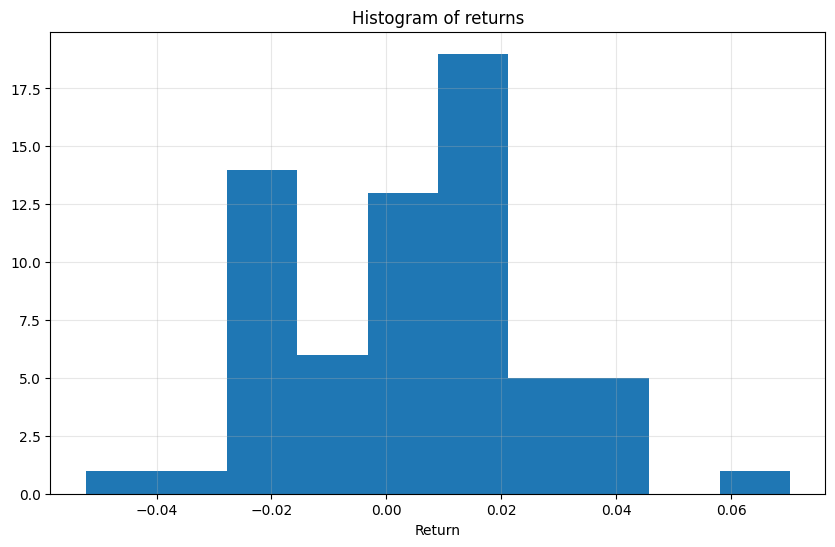

In [1636]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["active"] == 0]["return_pct"])
plt.xlabel("Return")
plt.title("Histogram of returns")
plt.grid(True, alpha=0.3)
plt.show()

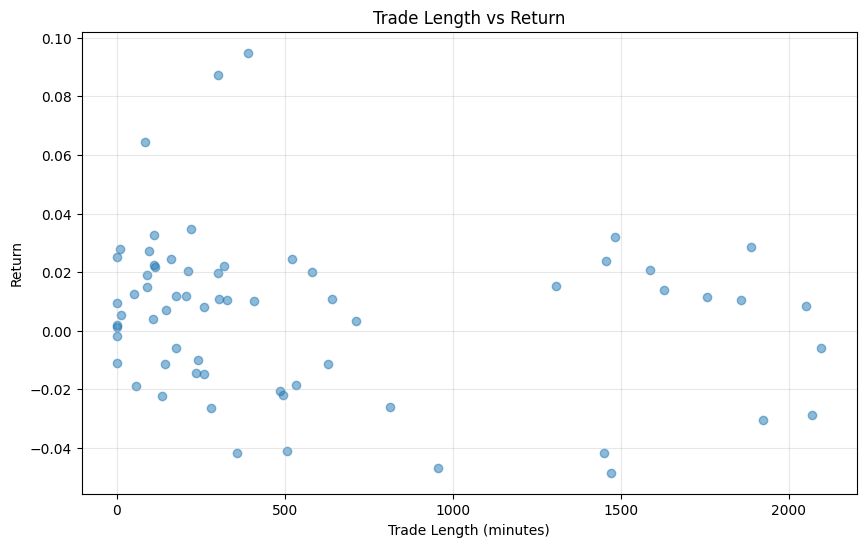

In [1637]:
plt.figure(figsize=(10, 6))
plt.scatter(df["trade_length"], df["return"], alpha=0.5)
plt.xlabel("Trade Length (minutes)")
plt.ylabel("Return")
plt.title("Trade Length vs Return")
plt.grid(True, alpha=0.3)
plt.show()